In [2]:
%load_ext autoreload
%autoreload 1
%aimport transformations

transformations loaded, version: 0.1


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 113

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

RS = 35577 # global random state seed
data_path = './data-raw/'

%aimport transformations
%aimport f

framework loaded, version: 0.1


In [5]:
df_data = f.from_pkl(f'data-processed/data_clean.data.pkl')
df_data.shape
df_data.columns
df_data.head(3)

(9893842, 13)

Index(['experiment_id', 'bearing_1_id', 'bearing_2_id', 'timestamp', 'a1_x',
       'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm', 'w', 'status'],
      dtype='object')

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,w,status
4912,1,0,1,1.637333,-0.271517,0.244341,-0.302339,0.285992,0.194450,0.255007,36.644951,0.078311,0
4913,1,0,1,1.637667,-0.079124,0.149706,-0.206307,0.002779,0.194450,0.354653,36.644951,0.028275,0
4914,1,0,1,1.638000,-0.175320,-0.228832,-0.110275,0.285992,0.290562,-0.243222,36.644951,0.013856,0


In [6]:
df_exp1 = df_data.loc[df_data['experiment_id'] == 1, ['timestamp','rpm']].copy()

df_exp1[['timestamp','rpm']] = StandardScaler().fit_transform(df_exp1[['timestamp','rpm']])

df_exp1['rpm_clusters'] = KMeans(n_clusters=3, random_state=RS).fit_predict(df_exp1[['timestamp','rpm']])
df_exp1['rpm_clusters'] = df_exp1['rpm_clusters'].astype('category')
df_exp1['rpm_clusters'].value_counts()

1    45583
2    19614
0    15091
Name: rpm_clusters, dtype: int64

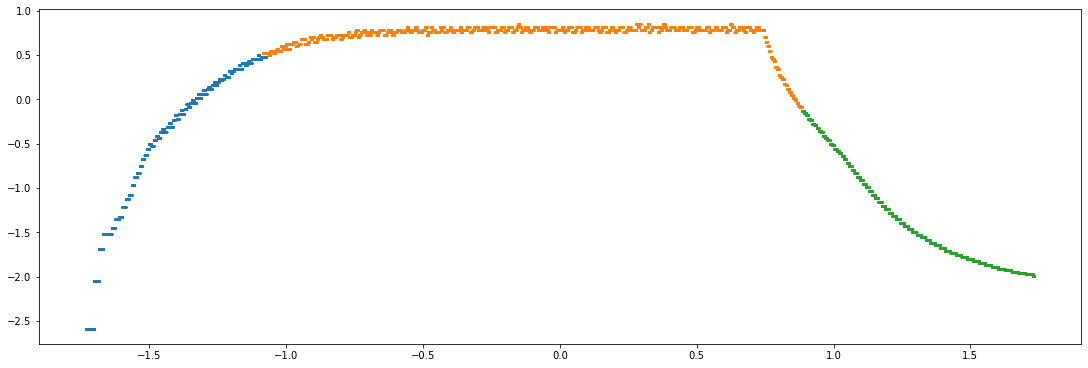

In [12]:
ax = f.get_ax(1, 3)

for c in df_exp1['rpm_clusters'].unique():
    x = df_exp1.loc[df_exp1['rpm_clusters'] == c, ['timestamp','rpm']]
    _ = ax.scatter(x['timestamp'], x['rpm'], s=1)

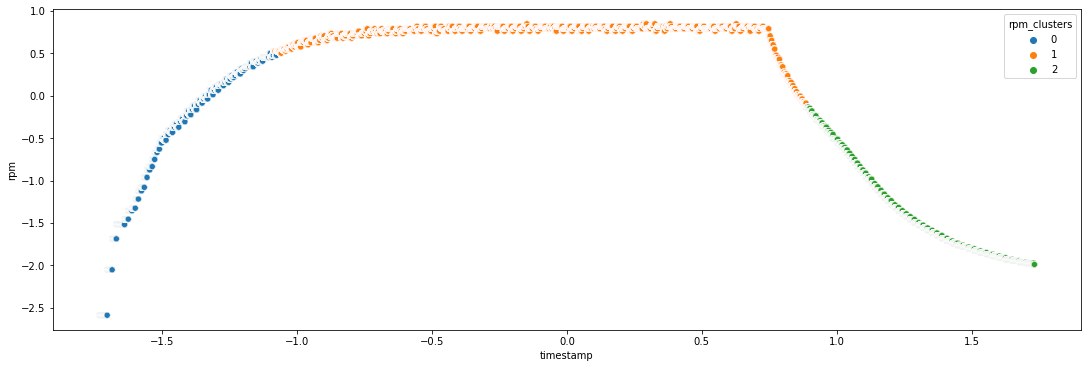

In [20]:
df_plt = df_exp1
ax = f.get_ax(1, 3)
_ = sns.scatterplot(data=df_plt, x='timestamp', y='rpm', ax=ax, hue='rpm_clusters')

In [21]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html